     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=bacb2e7e960c486a6b537e605a9cca526a073faa8319e13b0ba18bff60367d4f
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib
(18572, 8)


,所得,築年数,地域人口,緯度,部屋数/人
0,0.034653,0.178247,-0.075532,0.760166,-0.837592
1,-0.368102,-0.170455,-0.767887,1.220266,1.614325
2,0.602835,1.573057,-0.256822,0.714662,-0.405778
3,1.406941,-0.780684,1.212489,0.532645,0.112610
4,-0.688367,1.311530,-0.178263,-1.444266,-0.694816


,所得,築年数,地域人口,緯度,部屋数/人
count,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04
mean,4.533263e-15,7.651999e-17,8.280556e-17,-8.354643e-14,1.134163e-14
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-2.038837e+00,-2.262670e+00,-1.268592e+00,-2.420081e+00,-1.850904e+00
25%,-7.374752e-01,-8.678601e-01,-5.701945e-01,-1.034727e+00,-4.232155e-01
50%,-1.394514e-01,3.896079e-03,-2.291970e-01,5.225325e-01,-2.454245e-02
75%,5.805695e-01,7.884766e-01,2.622279e-01,7.652223e-01,2.989548e-01
max,7.211958e+00,2.096111e+00,2.952823e+01,2.615732e+00,3.790064e+01


,所得,築年数,地域人口,緯度,部屋数/人
0,-0.467563,0.788477,0.786026,1.119145,-0.509344
1,-0.936412,0.875652,-1.213342,-0.741477,-0.036639
2,0.562961,-1.565265,0.653943,1.124201,0.100350
3,1.164446,0.701301,-0.367323,0.487140,-0.372270
4,-0.931181,1.660233,-1.188306,-1.181352,-0.177363


,所得,築年数,地域人口,緯度,部屋数/人
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,-0.005149,0.008292,-0.020433,-0.002439,0.030341
std,1.005489,0.988514,1.012970,1.005098,1.245476
min,-2.038837,-2.175494,-1.272908,-2.435249,-1.752933
25%,-0.748863,-0.780684,-0.583144,-1.065063,-0.407443
50%,-0.154763,0.003896,-0.253369,0.517476,-0.011944
75%,0.592882,0.788477,0.258559,0.765222,0.303824
max,7.211958,2.096111,23.385096,2.534835,51.258832


0.4603651309002521
0.4706594329174044
予測値：[3.35580228 3.69927846 3.08176859]
各要素の重み：[ 0.65068953  0.16707081  0.04658818 -0.00624965  0.05101327]
切片：1.8977734592307653


<ipython-input-1-f2105ce669c2>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ['所得', '築年数', '地域人口', '緯度', '部屋数/人'], y=model.coef_, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: Whe

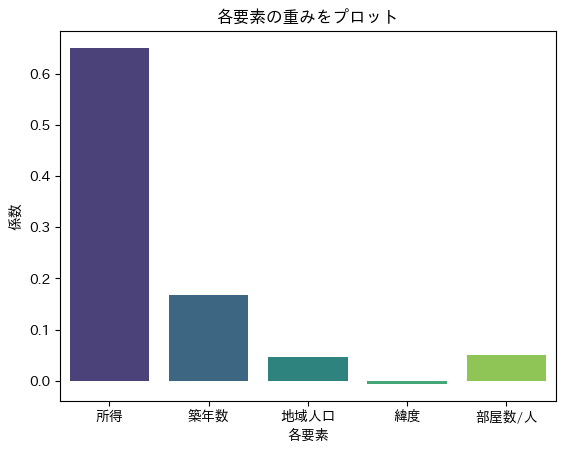

In [1]:
# 機械学習でデータ分析しよう
# 11章 回帰の手法を学ぼう #2
# 5) 回帰手法の改善（多重共線性の対処）
# (2) 多重共線性の対処後の重回帰を実施

# 日本語設定をインストール（セッション切れたら再実行が必要）
!pip install japanize-matplotlib
import japanize_matplotlib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

# 前処理を実施したCSVファイルをGoogle Colaboratoryにアップロードし、pandasのread_csv関数で読み込む
df = pd.read_csv('/content/california_housing_cleansing.csv')
#display(df1.head())

# 取り込んだデータ「Unnamed: 0」という列を削除
# 前処理のときにインデックス列として表示されていたもので、取込むデータの列名がブランクの場合、
# その列は自動的に「Unnamed: 数字」という列名が割り振られる
df = df.drop(columns = ['Unnamed: 0'])
print(df.shape)

# 説明変数Xと目的変数yを最定義
X = df[['所得', '築年数', '地域人口', '緯度', '部屋数/人']].to_numpy()
y = df['住宅価格'].to_numpy()

# (1) 説明変数のスケール変換
# Xとyをそれぞれ学習データとテストデータに分割する
# train_test_split関数をインポート
from sklearn.model_selection import train_test_split

# 上記の関数を使用し、比率7:3で学習データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# StandardScalerクラスのインポート
from sklearn.preprocessing import StandardScaler

# 上記のクラスをインスタンス化し、scalerという変数に代入する
scaler = StandardScaler()

# 標準化の変換モデルの生成
scaler.fit(X_train)

# 標準化の変換モデルを利用したスケールの変換
X_train_scaled = scaler.transform(X_train)
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=['所得', '築年数', '地域人口', '緯度', '部屋数/人'])
display(df_X_train_scaled.head())
display(df_X_train_scaled.describe())

X_test_scaled = scaler.transform(X_test)
df_X_test_scaled = pd.DataFrame(X_test_scaled, columns=['所得', '築年数', '地域人口', '緯度', '部屋数/人'])
display(df_X_test_scaled.head())
display(df_X_test_scaled.describe())

# (2) 予測モデルの学習
# linear_modelモジュールのLinearRegressクラスをインポート
from sklearn.linear_model import LinearRegression

# 上記のクラスをインスタンス化し、modelという変数に代入する
model = LinearRegression()

# 学習データで学習を実行する
model.fit(X_train_scaled, y_train)

# (3) 予測モデルの評価
#print(f"学習データの決定係数：{model.score(X_train_scaled, y_train)}")
#print(f"テストデータの決定係数：{model.score(X_test_scaled, y_test)}")
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))

# (4) 予測
# テストデータを取り込む
X_new = np.array([[8, 41, 500, 38, 2],
                 [10, 10, 1000, 40, 1],
                 [7.5, 25, 3500, 39, 3]])

# 生成した標準化の変換モデルを利用して、説明変数のテストデータX_newを変換する
X_new_scaled = scaler.transform(X_new)

# 予測モデルを利用し、X_newから予測値を算出
print(f"予測値：{model .predict(X_new_scaled)}")

# (4) 設定したゴールに対する考察
# 住宅価格を予測する計算式を決定する
print(f"各要素の重み：{model.coef_}")
print(f"切片：{model.intercept_}")

# 各要素が住宅価格に与える影響度合い
# 各要素の重みとして得られたmodel.coef_の値をグラフで可視化する
sns.barplot(x = ['所得', '築年数', '地域人口', '緯度', '部屋数/人'], y=model.coef_, palette='viridis')
plt.title('各要素の重みをプロット')
plt.xlabel('各要素')
plt.ylabel('係数')
plt.show()